**load and explore the data**

       RHOB         GR  DEPTH_MD  NPHI        PEF         DTC
0  1.884186  80.200851   494.528   NaN  20.915468  161.131180
1  1.889794  79.262886   494.680   NaN  19.383013  160.603470
2  1.896523  74.821999   494.832   NaN  22.591518  160.173615
3  1.891913  72.878922   494.984   NaN  32.191910  160.149429
4  1.880034  71.729141   495.136   NaN  38.495632  160.128342
               RHOB            GR      DEPTH_MD          NPHI           PEF  \
count  18270.000000  18270.000000  18270.000000  14032.000000  16440.000000   
mean       2.110451     63.847477   1883.228478      0.404547      3.463851   
std        0.297725     28.636331    801.941195      0.133532      2.561239   
min        1.404576      6.191506    494.528000      0.024330      1.010027   
25%        1.963399     43.866690   1188.750000      0.315346      2.320836   
50%        2.055079     66.777851   1882.972000      0.448527      2.790249   
75%        2.381963     81.542681   2577.802000      0.506343      4.267342

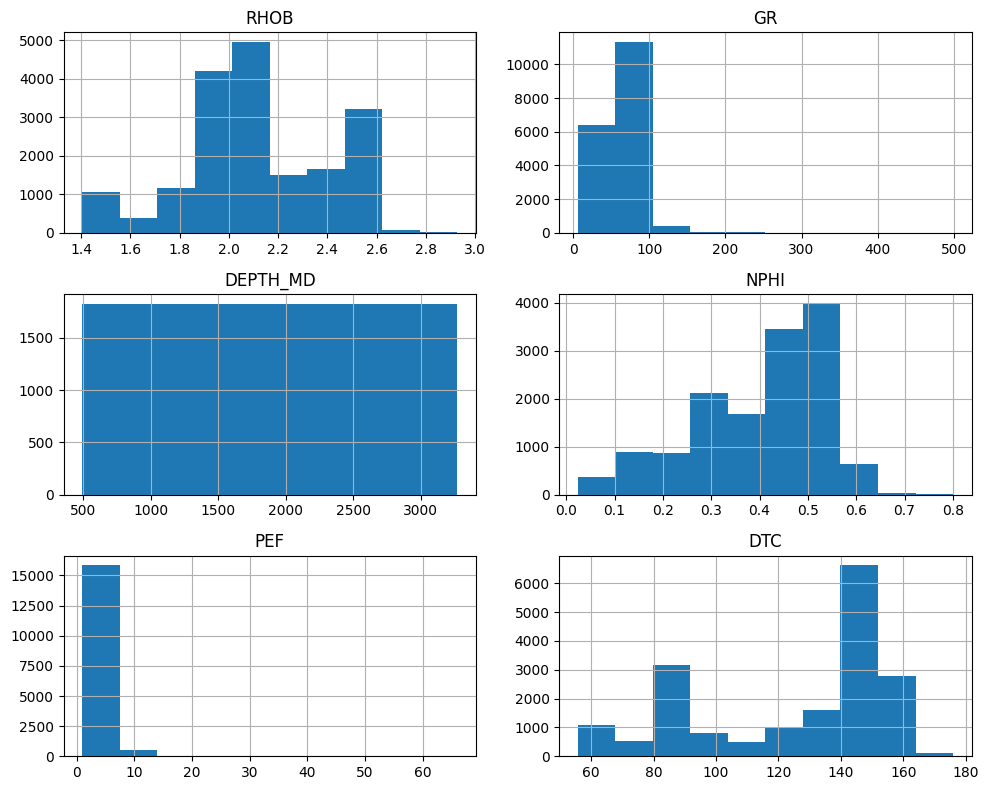

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("force2020_data (1).csv")


print(data.head())


print(data.describe())


data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


# **preprocess the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


**Apply Clustering Algorithms**

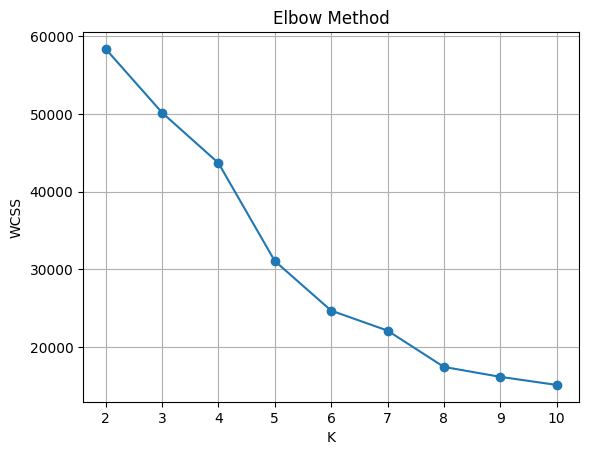

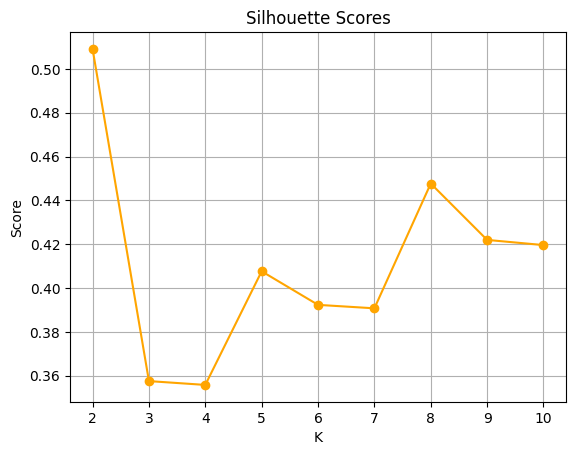

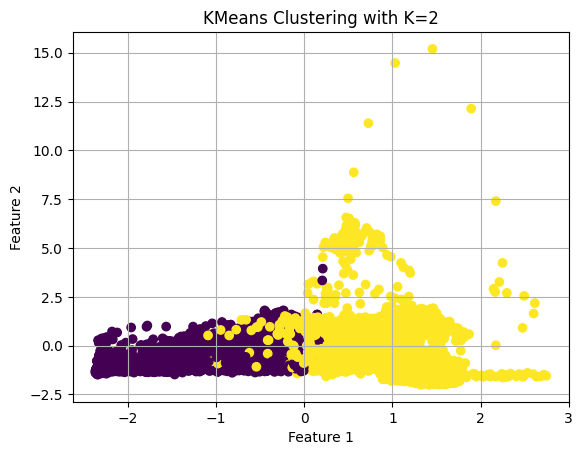

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the data
data = pd.read_csv("force2020_data (1).csv")

# Fix: Fill missing values with column mean
data = data.fillna(data.mean(numeric_only=True))

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

wcss = []
silhouette_scores = []

# Try K from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow Curve
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Visualize clusters (choose any 2 features)
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=best_k)
clusters = kmeans.fit_predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title(f'KMeans Clustering with K={best_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


**Agglomerative Hierarchical Clustering**

Linkage: ward, Silhouette Score: 0.5131637228989459


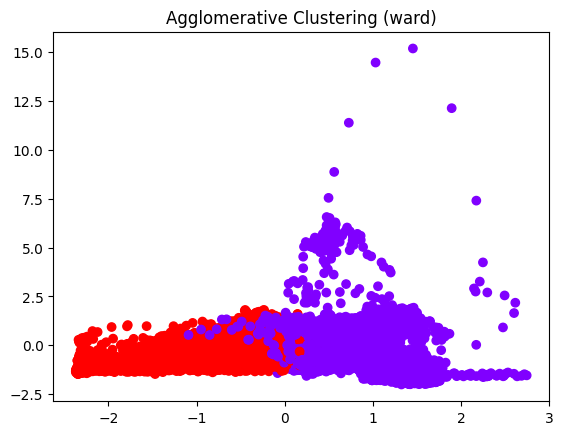

Linkage: complete, Silhouette Score: 0.7997100045040744


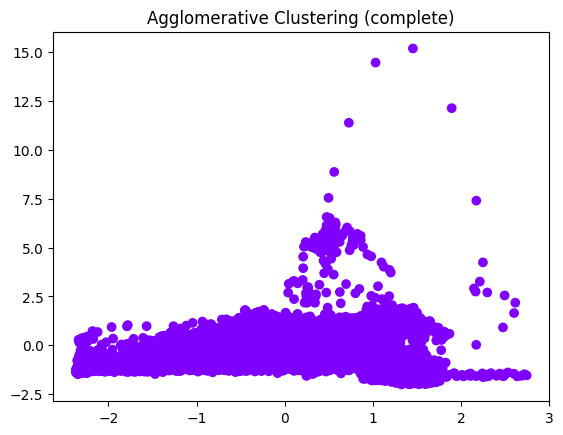

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Try different linkage methods
for link in ['ward', 'complete', 'average']:
    model = AgglomerativeClustering(n_clusters=best_k, linkage=link)
    labels = model.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"Linkage: {link}, Silhouette Score: {score}")

    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering ({link})')
    plt.show()



**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

# Try some eps and min_samples values
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_data)

# Silhouette Score (only if more than 1 cluster)
if len(set(labels)) > 1:
    score = silhouette_score(scaled_data, labels)
    print("DBSCAN Silhouette Score:", score)
else:
    print("Only one cluster found by DBSCAN")

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.show()


**Compare and Evaluate Clustering**

In [ ]:
# ### Clustering Evaluation Summary

# #### ➤ Best Algorithm:
# Based on the Silhouette Score, **KMeans** performed the best among all algorithms tested.

# #### ➤ Optimal Number of Clusters:
# The best number of clusters was **K = X** (based on the highest silhouette score).

# #### ➤ Additional Notes:
# - Agglomerative clustering produced reasonable results, but the silhouette scores were lower than KMeans.
# - DBSCAN either grouped most points into a single cluster or produced many noise points, indicating it may not be ideal for this dataset with the given parameters.
